# Model for Nature Conservancy Fisheries Kaggle Competition

#### Dependencies

In [1]:
import fish_data as fd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import json

#### Helper functions

In [2]:
help(fd)

Help on module fish_data:

NAME
    fish_data

DESCRIPTION
    fish_data module contains the helper functions for the model build of the
    Nature Conservancy Fisheries Kaggle Competition.
    
    Dependencies:
        * numpy as np
        * os
        * scipy.ndimage as ndimage
        * scipy.misc as misc
        * scipy.special as special
        * matplotlib.pyplot as plt
        * tensorflow as tf

FUNCTIONS
    count_nodes(x, y, kernel, stride, conv_depth, pad='SAME')
        Calculates the number of total nodes present in the next layer of a
        convolution OR max_pooling event.
    
    decode_image(image_name, size, num_channels=3, mean_channel_vals=[155.0, 155.0, 155.0], mutate=False, crop='random', crop_size=224)
        Converts a dequeued image read from filename to a single tensor array,
        with modifications:
            * smallest dimension resized to standard height and width supplied in size param
            * each channel centered to mean near zero.  Dev

#### Generate a list of filenames

In [3]:
fish_filenames = fd.generate_filenames_list('data/train/', subfolders = True)
print("There are {} filenames in the master set list".format(len(fish_filenames)))
test_filenames = fd.generate_filenames_list('data/test_stg1/', subfolders = False)
print("There are {} filenames in the test set list".format(len(test_filenames)))

There are 3777 filenames in the master set list
There are 1000 filenames in the test set list


#### Generate the labels for the master set list

In [4]:
fish_label_arr = fd.make_labels(fish_filenames, 'train/', '/img')
fish_label_arr.shape
print("One-hot labels generated correctly: {}".format(all(np.sum(fish_label_arr, 0) == [1719, 200, 117, 67, 465, 299, 176, 734]) ))

One-hot labels generated correctly: True


In [5]:
f_list, f_labels = fd.generate_balanced_filenames_epoch(fish_filenames, fish_label_arr, shuffle = False)

Fish counts: [1719  200  117   67  465  299  176  734]
New fish counts: [1719 1719 1719 1719 1719 1719 1719 1719]


#### Shuffle and split the master set list into training and validation sets

In [6]:
valid_size = 300
files_train, files_val, y_train, y_val = train_test_split(f_list, f_labels, test_size = valid_size)
print("Validation set size: {}".format(y_val.shape[0]))
print("Training set size: {}".format(y_train.shape[0]))

Validation set size: 300
Training set size: 13452


In [7]:
val_data, val_labels = fd.process_batch(files_val, y_val, offset = 0, batch_size = valid_size, 
                        std_size = 256, crop_size = 224, crop_mode = 'centre', normalize = 'custom', 
                        pixel_offset = 100, pixel_factor = 100.0,
                        mutation = False, verbose = True)

Batch shape: (300, 224, 224, 3)
Mean pixel value: -0.01929 +/- 0.558
Batch label counts: [41 30 35 30 37 46 46 35]
Batch set is 180.6336 Mb


In [8]:
example_batch, example_labels = fd.process_batch(files_train, y_train, offset = 0, batch_size = 5, 
                        std_size = 256, crop_size = 224, crop_mode = 'random', normalize = None, 
                        pixel_offset = 100, pixel_factor = 100.0,
                        mutation = True, verbose = True)

Batch shape: (5, 224, 224, 3)
Mean pixel value: 94.6 +/- 61.4
Batch label counts: [1 1 0 0 0 2 0 1]
Batch set is 3.01056 Mb


Fish Label: 7


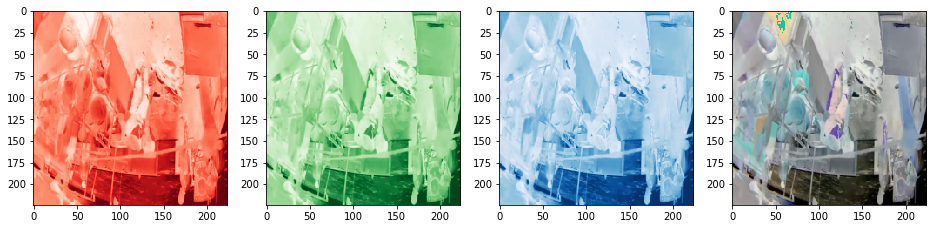

Fish Label: 5


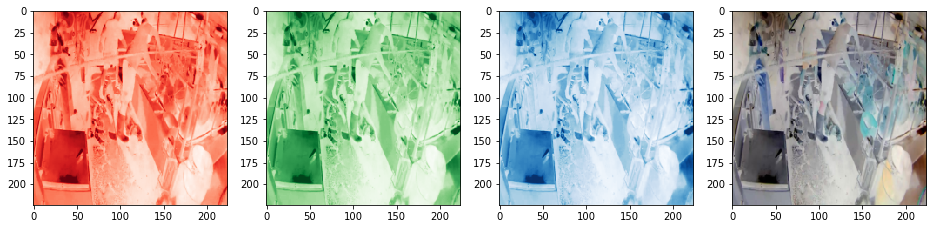

Fish Label: 0


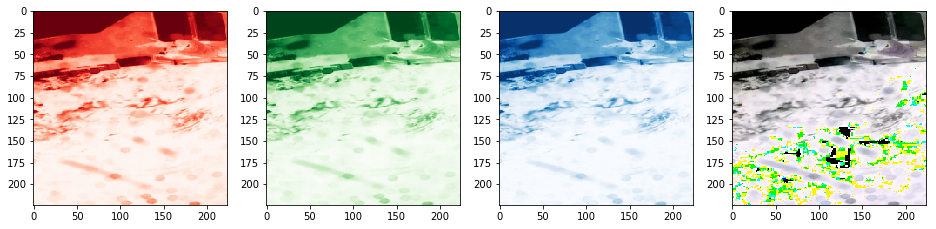

Fish Label: 1


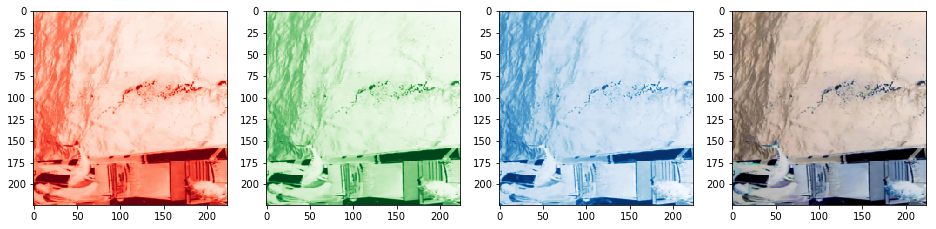

Fish Label: 5


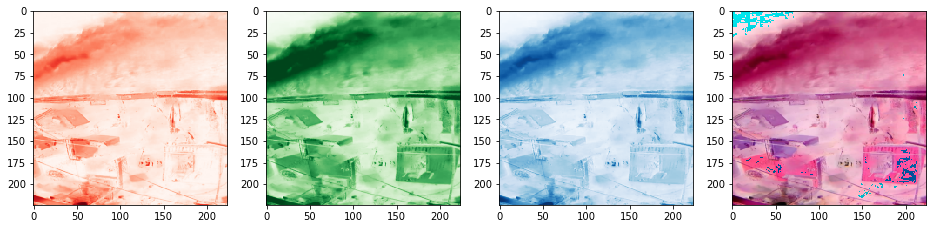

In [9]:
for x in range(5):
    print("Fish Label: {}".format(np.argmax(example_labels[x,:],0)))
    fd.show_panel(example_batch[x,:,:,:])

## Graph and Session Runs

#### Graph parameters

In [ ]:
%run -i 'PARAMETERS.py'

#### Session parameters

In [ ]:
version_ID = 'v2.0.0.5'

In [ ]:
%run -i 'GRAPH.py'

In [ ]:
%run -i 'SESSION.py'

#### Notes during run 
